In [21]:
# %pip install category_encoders
# %pip install pytorch_tabnet


## * Load Dataset (Train/Test)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
# we got the feature names from http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
headers = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'target']

# we got the dataset from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
dataset = pd.read_csv('./kddcup.data_10_percent_corrected', header=None) # Train dataset
dataset.columns = headers

dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [23]:
# we got the test dataset from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
test_dataset = pd.read_csv('./corrected', header=None)

test_dataset.columns = headers
test_dataset.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


## * Dataset Analysis

In [24]:
print("Number of features (Train): ", len(dataset.axes[1]) - 1)
print("Number of data samples(Train): ", len(dataset.axes[0]))
print("###############################")
print("Data type of each column (Train): " )
print(dataset.dtypes)


Number of features (Train):  41
Number of data samples(Train):  494021
###############################
Data type of each column (Train): 
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
coun

In [25]:
print("Number of features(Test): ", len(test_dataset.axes[1]) - 1)
print("Number of data samples(Test): ", len(test_dataset.axes[0]))
print("###############################")
print("Data type of each column(Test): " )
print(test_dataset.dtypes)

Number of features(Test):  41
Number of data samples(Test):  311029
###############################
Data type of each column(Test): 
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count    

Check for null values, the Train and test datasets do not have null values

In [26]:
dataset.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [27]:
test_dataset.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

check for duplicates in train and test, and drop them

In [28]:
print(dataset.duplicated().sum())

dataset.drop_duplicates(keep='first', inplace = True)
print("Number of train data samples: ", len(dataset.axes[0]))

348435
Number of train data samples:  145586


In [29]:
print(test_dataset.duplicated().sum())

test_dataset.drop_duplicates(keep='first', inplace = True)
print("Number of test data samples: ", len(test_dataset.axes[0]))

233738
Number of test data samples:  77291


Discover the categorical columns

Types of protocols used in the train dataset: 
tcp     130913
udp      12267
icmp      2406
Name: protocol_type, dtype: int64


Text(0.5, 1.0, 'Protocol_type column (Train)')

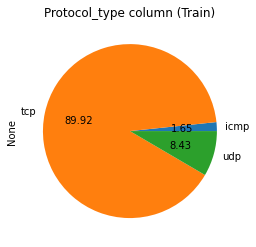

In [30]:
print("Types of protocols used in the train dataset: ")
print(dataset['protocol_type'].value_counts())

dataset.groupby('protocol_type').size().plot(kind='pie', autopct='%.2f')
plt.title("Protocol_type column (Train)")




Types of protocols used in the test dataset: 
tcp     71124
udp      4692
icmp     1475
Name: protocol_type, dtype: int64


Text(0.5, 1.0, 'Protocol_type column (Test)')

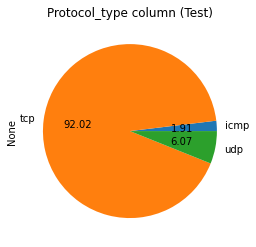

In [31]:
print("Types of protocols used in the test dataset: ")
print(test_dataset['protocol_type'].value_counts())

test_dataset.groupby('protocol_type').size().plot(kind='pie', autopct='%.2f')
plt.title("Protocol_type column (Test)")


In [32]:
print("Types of services used in the train dataset: ")
print(dataset['service'].value_counts())
print("Description of services used in the train dataset: ")
dataset['service'].describe()


Types of services used in the train dataset: 
http        62054
private     49057
smtp         9721
domain_u     5425
other        4769
            ...  
X11            11
tim_i           5
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64
Description of services used in the train dataset: 


count     145586
unique        66
top         http
freq       62054
Name: service, dtype: object

In [33]:
print("Types of services used in the test dataset: ")
print(test_dataset['service'].value_counts())
print("services not shared between train and test", set(dataset['service'].unique()).symmetric_difference(set(test_dataset['service'].unique())))
print("Description of services used in the test dataset: ")
test_dataset['service'].describe()


Types of services used in the test dataset: 
http        40350
private     19291
smtp         3574
domain_u     2622
telnet       1792
            ...  
pm_dump        16
X11            15
tim_i           6
icmp            2
tftp_u          1
Name: service, Length: 65, dtype: int64
services not shared between train and test {'red_i', 'urh_i', 'icmp'}
Description of services used in the test dataset: 


count     77291
unique       65
top        http
freq      40350
Name: service, dtype: object

Types of flags used in the train dataset: 
SF        87459
S0        42278
REJ       14712
RSTO        569
RSTR        425
S1           57
SH           34
S2           24
RSTOS0       11
S3           10
OTH           7
Name: flag, dtype: int64


Text(0.5, 1.0, 'Flag column (Train)')

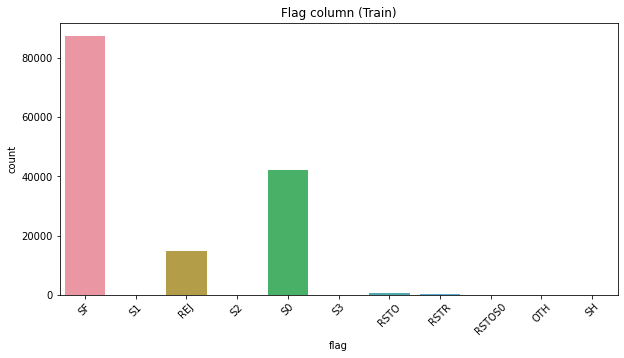

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
print("Types of flags used in the train dataset: ")
print(dataset['flag'].value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(x = dataset['flag'])
plt.xticks(rotation = 45)
plt.title("Flag column (Train)")


Types of flags used in the test dataset: 
SF        53624
REJ       13988
S0         7172
RSTO       1380
RSTR        718
S3          274
SH           80
S1           27
S2           22
OTH           4
RSTOS0        2
Name: flag, dtype: int64


Text(0.5, 1.0, 'Flag column (Test)')

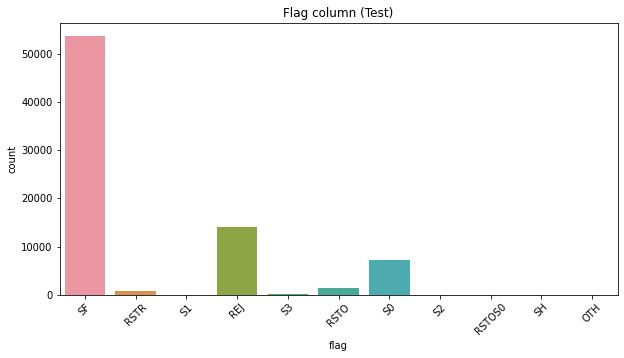

In [36]:
print("Types of flags used in the test dataset: ")
print(test_dataset['flag'].value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(x = test_dataset['flag'])
plt.xticks(rotation = 45)
plt.title("Flag column (Test)")



Class distrbution in the train and test datasets

We have 23 classes in the Train dataset, a normal class and the rest of classes are different attack types

######## Classess and their count (Train) ############## 
normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: target, dtype: int64
####### Description of the target column (Train) ##########


count      145586
unique         23
top       normal.
freq        87832
Name: target, dtype: object

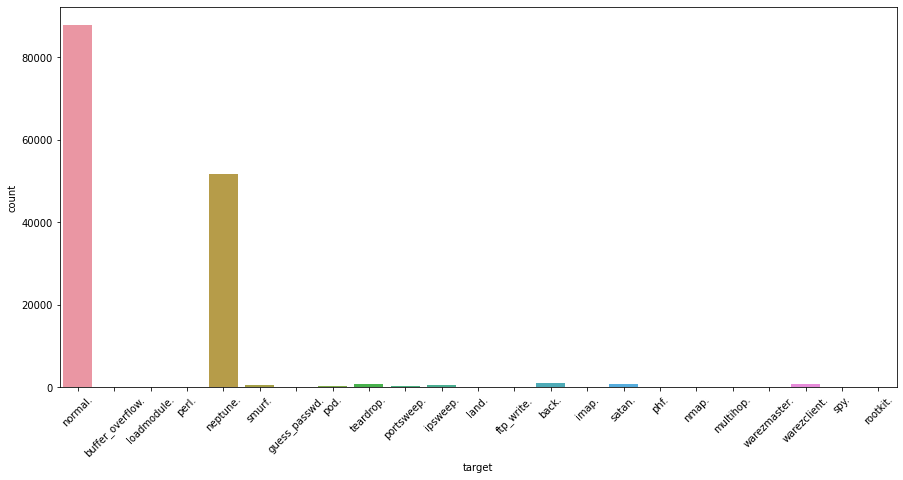

In [37]:
print("######## Classess and their count (Train) ############## ")
print(dataset['target'].value_counts())
plt.figure(figsize=(15, 7))
sns.countplot(x = dataset['target'])
plt.xticks(rotation = 45)

print("####### Description of the target column (Train) ##########")
dataset['target'].describe()

In the test dataset, we have 38 classes, a normal class and the rest are different attack types

######## Classess and their count in test dataset ############## 
normal.             47913
neptune.            20332
guess_passwd.        1302
mscan.               1049
warezmaster.         1002
smurf.                936
satan.                860
apache2.              794
processtable.         744
back.                 386
saint.                364
snmpguess.            359
mailbomb.             308
snmpgetattack.        179
portsweep.            174
ipsweep.              155
httptunnel.           145
nmap.                  80
pod.                   45
buffer_overflow.       22
multihop.              18
named.                 17
ps.                    16
sendmail.              15
rootkit.               13
xterm.                 13
teardrop.              12
xlock.                  9
land.                   9
xsnoop.                 4
ftp_write.              3
loadmodule.             2
perl.                   2
udpstorm.               2
worm.                   2
phf.                    

count       77291
unique         38
top       normal.
freq        47913
Name: target, dtype: object

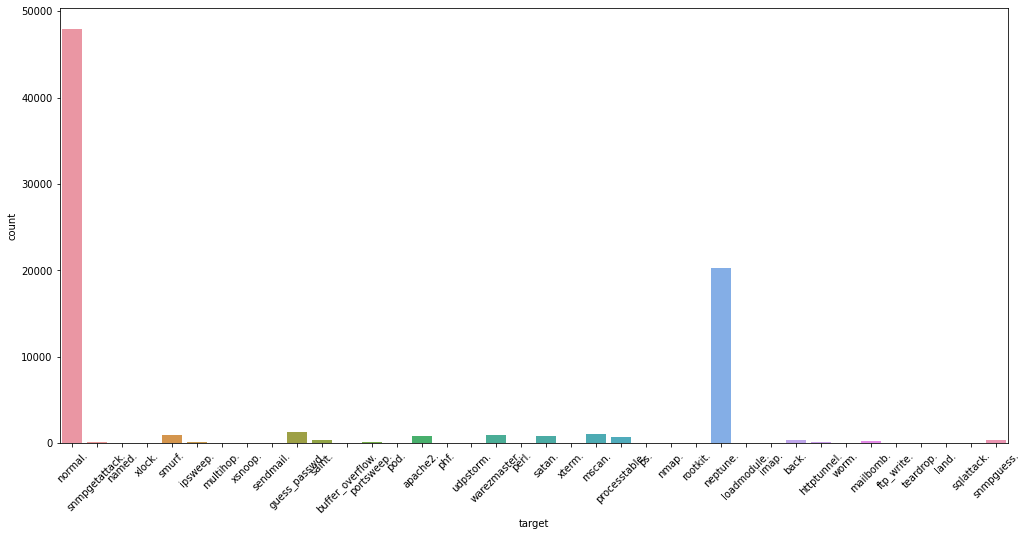

In [38]:
print("######## Classess and their count in test dataset ############## ")
print(test_dataset['target'].value_counts())
plt.figure(figsize=(17, 8))
sns.countplot(x = test_dataset['target'])
plt.xticks(rotation = 45)

print("####### Description of the target column in test dataset ##########")
test_dataset['target'].describe()

Convert the multi-class dataset to only two classes, normal traffic will be class 0, and any attack type will be class 1, as you can see the normal traffic is the majority class with around 60 percent of the entire dataset in both train and test datasets.
we are more interested in detecting the attack class, so in further steps we will apply resampling technique to balance the dataset. 

0    87832
1    57754
Name: target, dtype: int64


Text(0.5, 1.0, 'Class distrbution for the train dataset')

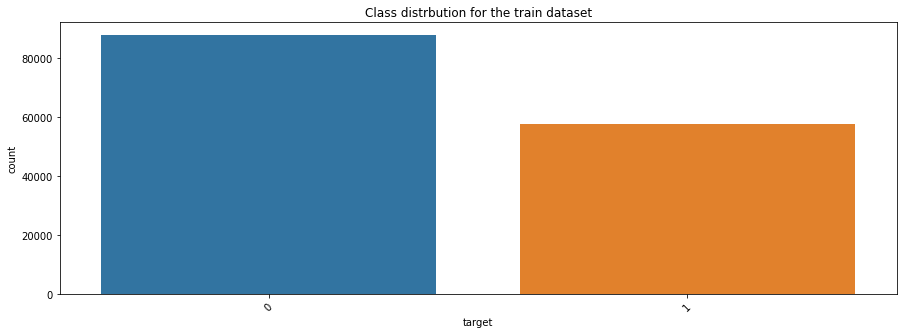

In [39]:
dataset['target'] = dataset['target'].apply(lambda x: 0 if x == 'normal.' else 1) 

print(dataset['target'].value_counts())
plt.figure(figsize=(15, 5))
sns.countplot(x = dataset['target'])
plt.xticks(rotation = 45)
plt.title("Class distrbution for the train dataset")


0    47913
1    29378
Name: target, dtype: int64


Text(0.5, 1.0, 'Class distrbution for the test dataset')

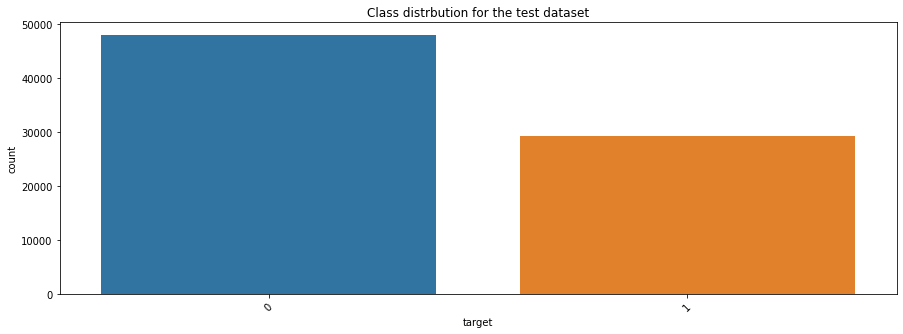

In [40]:
test_dataset['target'] = test_dataset['target'].apply(lambda x: 0 if x == 'normal.' else 1) 

print(test_dataset['target'].value_counts())
plt.figure(figsize=(15, 5))
sns.countplot(x = test_dataset['target'])
plt.xticks(rotation = 45)
plt.title("Class distrbution for the test dataset")

Text(0.5, 1.0, 'Class distrbution for the train dataset')

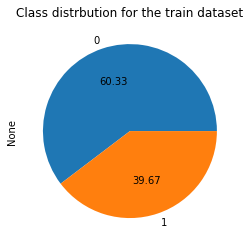

In [41]:
dataset.groupby('target').size().plot(kind='pie', autopct='%.2f')
plt.title("Class distrbution for the train dataset")

Text(0.5, 1.0, 'Class distrbution for the test dataset')

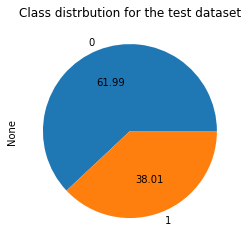

In [42]:
test_dataset.groupby('target').size().plot(kind='pie', autopct='%.2f')
plt.title("Class distrbution for the test dataset")

calculate the Deviate/skew from the normal distribution.

In [44]:
print("skew in train datasets")
dataset.skew()

skew in train datasets


C:\Users\noran\AppData\Local\Temp\ipykernel_23412\779416008.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


duration                        15.617861
src_bytes                      379.579057
dst_bytes                       74.338623
land                            85.302111
wrong_fragment                  12.157306
urgent                         243.006750
hot                             18.076224
num_failed_logins               87.285656
logged_in                        0.034047
num_compromised                226.920175
root_shell                      51.420551
su_attempted                   125.381941
num_root                       226.413492
num_file_creations             104.414950
num_shells                      59.086000
num_access_files                33.260757
num_outbound_cmds                0.000000
is_host_login                    0.000000
is_guest_login                  14.475612
count                            1.315566
srv_count                       10.868871
serror_rate                      0.921102
srv_serror_rate                  0.919555
rerror_rate                      2

Correlation Matrix between features

In [45]:
corr=dataset.drop(columns=['target']).corrwith(dataset['target'])
print(corr.sort_values(ascending=False))

count                          0.805478
serror_rate                    0.788613
dst_host_serror_rate           0.788309
dst_host_srv_serror_rate       0.788136
srv_serror_rate                0.787301
dst_host_count                 0.520493
diff_srv_rate                  0.232374
dst_host_rerror_rate           0.218788
dst_host_srv_rerror_rate       0.216936
rerror_rate                    0.216392
srv_rerror_rate                0.215428
dst_host_diff_srv_rate         0.125071
wrong_fragment                 0.104075
srv_count                      0.044315
hot                            0.043973
num_failed_logins              0.013383
land                           0.013257
is_guest_login                 0.008671
root_shell                     0.007356
src_bytes                      0.004556
urgent                         0.001692
num_compromised               -0.002022
su_attempted                  -0.006006
num_shells                    -0.007209
num_root                      -0.007849


Check the values of the num_outbound_cmds, and is_host_login columns, they are all zeroes, and do not have correlation with any of the other features or the target so we will drop them from the train and test datasets.

In [46]:
print(dataset['num_outbound_cmds'].value_counts())
print(dataset['is_host_login'].value_counts())

dataset = dataset.drop(columns= ['num_outbound_cmds','is_host_login'])

test_dataset = test_dataset.drop(columns= ['num_outbound_cmds','is_host_login'])

0    145586
Name: num_outbound_cmds, dtype: int64
0    145586
Name: is_host_login, dtype: int64


Plot the correlation matrix

Text(0.5, 1.0, 'correlation matrix for the train dataset')

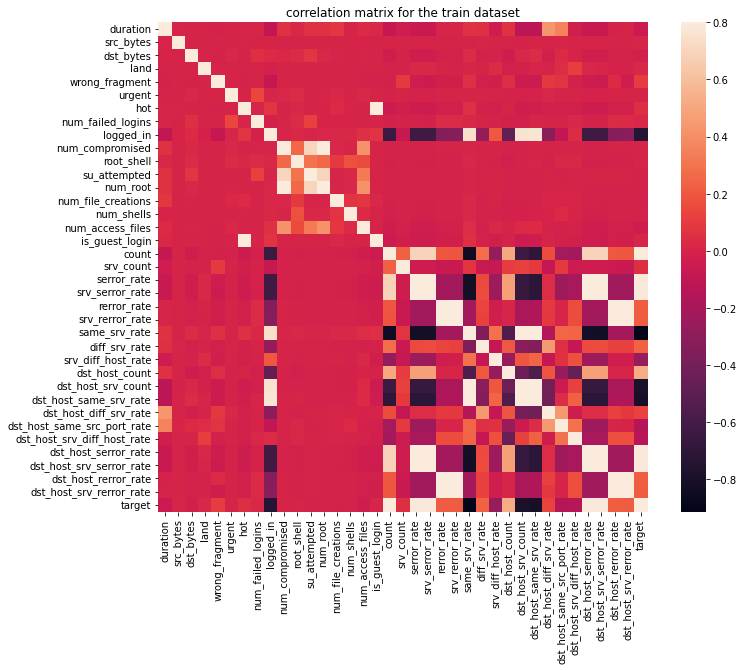

In [47]:
#correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title("correlation matrix for the train dataset")

In [48]:
corr=dataset.drop(columns=['target']).corrwith(dataset['target'])
print(corr.sort_values(ascending=False))

count                          0.805478
serror_rate                    0.788613
dst_host_serror_rate           0.788309
dst_host_srv_serror_rate       0.788136
srv_serror_rate                0.787301
dst_host_count                 0.520493
diff_srv_rate                  0.232374
dst_host_rerror_rate           0.218788
dst_host_srv_rerror_rate       0.216936
rerror_rate                    0.216392
srv_rerror_rate                0.215428
dst_host_diff_srv_rate         0.125071
wrong_fragment                 0.104075
srv_count                      0.044315
hot                            0.043973
num_failed_logins              0.013383
land                           0.013257
is_guest_login                 0.008671
root_shell                     0.007356
src_bytes                      0.004556
urgent                         0.001692
num_compromised               -0.002022
su_attempted                  -0.006006
num_shells                    -0.007209
num_root                      -0.007849


We handel the categorical columns by using binary encoding, binary encoding is useful in our case, because the unique values in test dataset and train dataset for the service column does not match in size, test dataset has 65 unique values, but the train contains 66 unique values, so one hot encoding will result in different number of features in the train and test, but binary encoding can solve this issue.

In [49]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=["protocol_type", "service", "flag"],return_df=True)
# encoder.fit(reduced_dataset) 
train_data=encoder.fit_transform(dataset) 
train_data

test_data=encoder.transform(test_dataset) 
test_data

,duration,protocol_type_0,protocol_type_1,service_0,service_1,service_2,service_3,service_4,service_5,service_6,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,1,0,0,0,0,1,1,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,1,0,0,0,0,1,1,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,1,0,0,0,0,1,1,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,1,0,0,0,0,1,1,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1
6,0,1,0,0,0,0,0,1,0,0,...,3,0.3,0.30,0.30,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,0,1,1,0,0,0,1,0,1,0,...,55,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0
310354,0,1,1,0,0,0,1,0,1,0,...,56,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0
310404,0,1,0,0,0,0,1,1,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
310667,0,1,1,0,0,0,1,0,1,0,...,67,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0


# * Model Selection

- First, we will try three models (Random forest, Tabnet, XGBoost) before any feature selection and data balancing to get the base models accuracy.

1) Random Forest

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report


X_train = train_data.drop(labels = ['target'], axis=1)
y_train = train_data['target']


X_test = test_data.drop(labels = ['target'], axis=1)
y_test = test_data['target']

RF_classifier = RandomForestClassifier(random_state=0, verbose=1)

RF_classifier.fit(X_train , y_train )
y_pred = RF_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

print("accuracy: " , accuracy_score(y_test, y_pred))
print( "Recall for class 1: ", recall_score(y_test, y_pred))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


: 

: 

Max recall =  0.8862414051330928
Min recall =  0.8157124378786847


Text(0, 0.5, 'recall score')

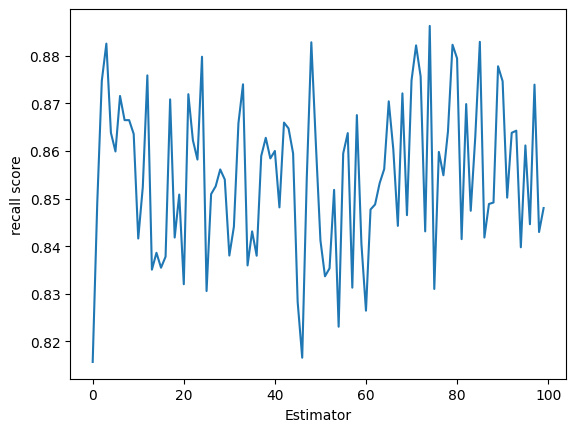

In [277]:
recall_list = []
for estimator in RF_classifier.estimators_ :
    recall_list.append(recall_score(y_test, estimator.predict(X_test.values)))

print("Max recall = ", max(recall_list))
print("Min recall = ", min(recall_list))
plt.plot(recall_list)
plt.xlabel('Estimator')
plt.ylabel('recall score')


2) Tabnet classifier

Create custom recall accuracy for the tabnet classifier

In [48]:
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import recall_score

class Recall_metric(Metric):
   
    def __init__(self):
        self._name = "recall_metric" # write an understandable name here
        self._maximize = True

    def __call__(self, y_true, y_score):
        # auc = recall_score(y_true, y_score[:, 1])
        # print(y_score[:, 1])
        # test= list(map(lambda x:round(x),y_score[:, 1]))
        y_pred = np.argmax(y_score, axis=1)
        return recall_score(y_true, y_pred)

In [181]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

x_train = train_data.drop(labels = ['target'], axis=1)
y_train = train_data['target']


x_test = test_data.drop(labels = ['target'], axis=1)
y_test = test_data['target']


tabnet_model = TabNetClassifier(seed= 0)

# fit the model 
tabnet_model.fit(
    x_train.values , y_train.values,
    eval_set=[(x_train.values, y_train.values), (x_test.values, y_test.values)],
    eval_name=['train', 'test'],
    eval_metric=[ 'balanced_accuracy', Recall_metric],
    max_epochs=200, patience=60,
    batch_size=1000, virtual_batch_size=1000,
    num_workers=0,
    weights=1,
    drop_last=False
)   

C:\Users\debi\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.08738 | train_balanced_accuracy: 0.97251 | train_recall_metric: 0.95559 | test_balanced_accuracy: 0.91219 | test_recall_metric: 0.85118 |  0:00:07s
epoch 1  | loss: 0.02519 | train_balanced_accuracy: 0.99301 | train_recall_metric: 0.99023 | test_balanced_accuracy: 0.93248 | test_recall_metric: 0.88093 |  0:00:15s
epoch 2  | loss: 0.02155 | train_balanced_accuracy: 0.99496 | train_recall_metric: 0.99316 | test_balanced_accuracy: 0.93495 | test_recall_metric: 0.87657 |  0:00:23s
epoch 3  | loss: 0.01635 | train_balanced_accuracy: 0.98844 | train_recall_metric: 0.98002 | test_balanced_accuracy: 0.94121 | test_recall_metric: 0.89087 |  0:00:31s
epoch 4  | loss: 0.01346 | train_balanced_accuracy: 0.98817 | train_recall_metric: 0.98149 | test_balanced_accuracy: 0.94518 | test_recall_metric: 0.90135 |  0:00:39s
epoch 5  | loss: 0.01123 | train_balanced_accuracy: 0.98882 | train_recall_metric: 0.98087 | test_balanced_accuracy: 0.93938 | test_recall_metric: 0.88614 |  0:00:47

C:\Users\debi\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [298]:
from sklearn.metrics import accuracy_score, classification_report

y_pred= tabnet_model.predict(x_test.values)

print(classification_report(y_test, y_pred))

print("accuracy: " , accuracy_score(y_test, y_pred))
print( "Recall for class 1: ", recall_score(y_test, y_pred))
print("Max Recall = " , max(tabnet_model.history['test_recall_metric']))
print("Min Recall = " , min(tabnet_model.history['test_recall_metric']))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     47913
           1       0.98      0.92      0.95     29378

    accuracy                           0.96     77291
   macro avg       0.97      0.96      0.96     77291
weighted avg       0.97      0.96      0.96     77291

accuracy:  0.9644978069891708
Recall for class 1:  0.9227312955272653
Max Recall =  0.9227312955272653
Min Recall =  0.8405609639866567


Text(0, 0.5, 'Recall score')

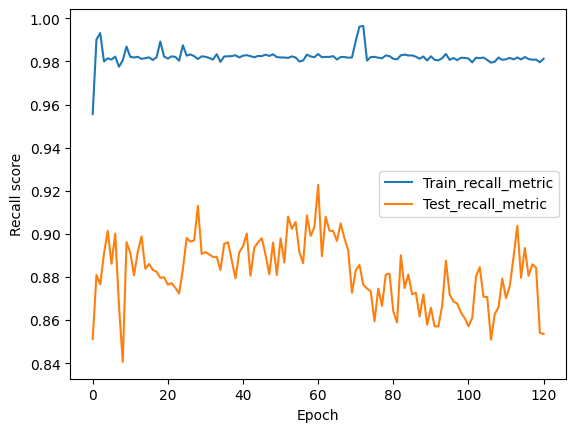

In [299]:
plt.plot(tabnet_model.history['train_recall_metric'] ,  label= "Train_recall_metric")
plt.plot(tabnet_model.history['test_recall_metric'] ,  label= "Test_recall_metric")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Recall score")

3) XGBoost classifier

In [473]:
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, recall_score, accuracy_score
X_train = train_data.drop(labels = ['target'], axis=1)
y_train = train_data['target']


X_test = test_data.drop(labels = ['target'], axis=1)
y_test = test_data['target']

xgbc = XGBClassifier(random_state=0 , objective = "multi:softmax", num_class=2 , eval_metric=recall_score)
xgbc.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

preds = xgbc.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,preds))
print( "Recall for class 1: ", recall_score(y_test, preds))



Accuracy: 93.59%
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     47913
           1       0.99      0.84      0.91     29378

    accuracy                           0.94     77291
   macro avg       0.95      0.92      0.93     77291
weighted avg       0.94      0.94      0.93     77291

Recall for class 1:  0.8411396282932807


Max recall =  0.858431
Min recall =  0.832187


Text(0, 0.5, 'recall score')

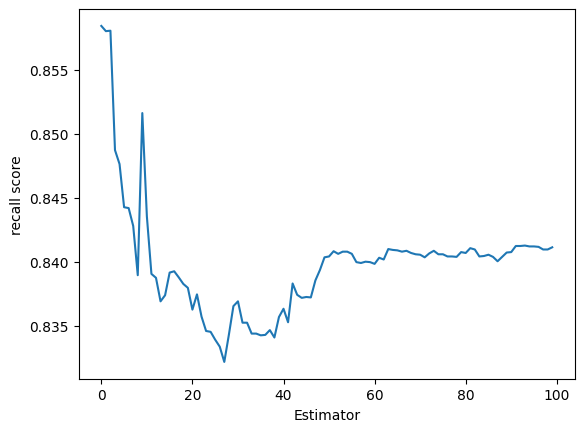

In [474]:

print("Max recall = ", max(xgbc.evals_result()['validation_0']['recall_score']))
print("Min recall = ", min(xgbc.evals_result()['validation_0']['recall_score']))
plt.plot(xgbc.evals_result()['validation_0']['recall_score'])
plt.xlabel('Estimator')
plt.ylabel('recall score')

### Feature Selectio with SelectKBest 

First we drop the three categorical columns, and do feature selection without them

In [54]:
dataset_new = dataset.drop(labels = ['protocol_type','service','flag'], axis=1)

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  mutual_info_classif 
import numpy as np
from functools import partial

X_data = dataset_new.drop(dataset_new.columns[-1], axis=1)
y_data = dataset_new.iloc[:,-1:] 

fs = SelectKBest(score_func=partial( mutual_info_classif, random_state = 0), k='all')
fs.fit(X_data,y_data)
X_train_fs = fs.transform(X_data)

feature_importances = [(feature, importance) for feature, importance in zip(X_data.columns, fs.scores_)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
print(feature_importances)


importances_sorted = [importance[1] for importance in feature_importances]
print("Feature improtances: " , importances_sorted)
important_features_indx = np.where(np.array(importances_sorted) > 0.03)[0]
important_feature_names = [feature_importances[indx][0] for indx in important_features_indx]   

print( "Best featues" , important_feature_names)
print( "Best featues count : " , len(important_feature_names))



C:\Users\debi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[('same_srv_rate', 0.5400585143564693), ('src_bytes', 0.539928296986131), ('diff_srv_rate', 0.5254734403388646), ('count', 0.5030589665221885), ('dst_host_same_srv_rate', 0.4559443257471958), ('dst_bytes', 0.45435099042409455), ('dst_host_srv_count', 0.45379736865006803), ('dst_host_diff_srv_rate', 0.4356032503539784), ('dst_host_serror_rate', 0.3799177790537265), ('dst_host_srv_serror_rate', 0.3777391558278198), ('serror_rate', 0.37745237308954405), ('srv_serror_rate', 0.3728246340370036), ('logged_in', 0.33405198082995624), ('dst_host_count', 0.21525684280557345), ('dst_host_same_src_port_rate', 0.2151765265649339), ('dst_host_srv_diff_host_rate', 0.2092780745134779), ('srv_diff_host_rate', 0.11353660483204675), ('srv_count', 0.07685363453154803), ('dst_host_srv_rerror_rate', 0.04973748567063807), ('dst_host_rerror_rate', 0.02724396409380514), ('duration', 0.026092855415111194), ('rerror_rate', 0.02568518973146383), ('srv_rerror_rate', 0.02434797802002331), ('hot', 0.0083036827151197

Text(0, 0.5, 'Importance')

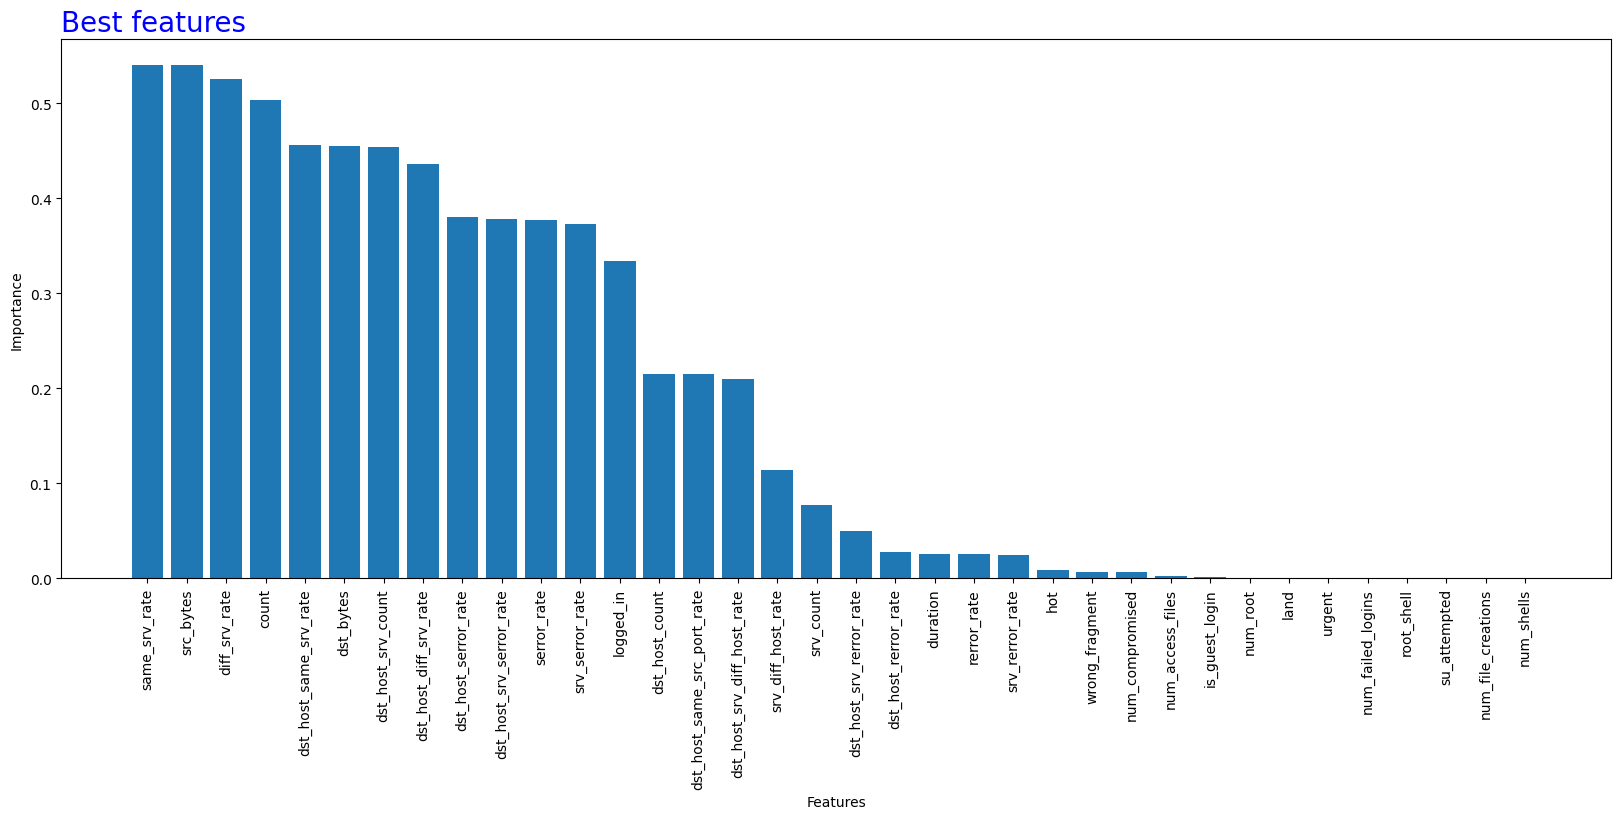

In [295]:
# plt.bar([i for i in range (len(important_feature_names))],important_feature_names )
# importances_sorted
plt.figure(figsize=(20,7))
plt.bar(*zip(*feature_importances) )
plt.title('Best features',fontsize=20,loc='left',color='blue')
plt.xlabel('Features')
plt.xticks(rotation = 90)
plt.ylabel('Importance')

Now, we combine again the categorical columns to the best features to get the entire rduced dataset.

In [56]:
import pandas as pd
selected_features= important_feature_names + ['protocol_type','service','flag', 'target']
print(selected_features)

reduced_dataset =dataset[selected_features]
reduced_dataset

['same_srv_rate', 'src_bytes', 'diff_srv_rate', 'count', 'dst_host_same_srv_rate', 'dst_bytes', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'serror_rate', 'srv_serror_rate', 'logged_in', 'dst_host_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'srv_diff_host_rate', 'srv_count', 'dst_host_srv_rerror_rate', 'protocol_type', 'service', 'flag', 'target']


,same_srv_rate,src_bytes,diff_srv_rate,count,dst_host_same_srv_rate,dst_bytes,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,...,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,srv_diff_host_rate,srv_count,dst_host_srv_rerror_rate,protocol_type,service,flag,target
0,1.0,181,0.0,8,1.0,5450,9,0.0,0.00,0.00,...,9,0.11,0.00,0.00,8,0.0,tcp,http,SF,0
1,1.0,239,0.0,8,1.0,486,19,0.0,0.00,0.00,...,19,0.05,0.00,0.00,8,0.0,tcp,http,SF,0
2,1.0,235,0.0,8,1.0,1337,29,0.0,0.00,0.00,...,29,0.03,0.00,0.00,8,0.0,tcp,http,SF,0
3,1.0,219,0.0,6,1.0,1337,39,0.0,0.00,0.00,...,39,0.03,0.00,0.00,6,0.0,tcp,http,SF,0
4,1.0,217,0.0,6,1.0,2032,49,0.0,0.00,0.00,...,49,0.02,0.00,0.00,6,0.0,tcp,http,SF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,1.0,310,0.0,4,1.0,1881,255,0.0,0.00,0.01,...,86,0.01,0.05,0.40,5,0.0,tcp,http,SF,0
494017,1.0,282,0.0,6,1.0,2286,255,0.0,0.00,0.01,...,6,0.17,0.05,0.00,6,0.0,tcp,http,SF,0
494018,1.0,203,0.0,6,1.0,1200,255,0.0,0.06,0.01,...,16,0.06,0.05,0.17,18,0.0,tcp,http,SF,0
494019,1.0,291,0.0,6,1.0,1200,255,0.0,0.04,0.01,...,26,0.04,0.05,0.17,12,0.0,tcp,http,SF,0


In [57]:
reduced_test = test_dataset[selected_features]
reduced_test

,same_srv_rate,src_bytes,diff_srv_rate,count,dst_host_same_srv_rate,dst_bytes,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,...,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,srv_diff_host_rate,srv_count,dst_host_srv_rerror_rate,protocol_type,service,flag,target
0,1.0,105,0.0,1,1.0,146,254,0.01,0.0,0.0,...,255,0.00,0.0,0.0,1,0.0,udp,private,SF,0
3,1.0,105,0.0,2,1.0,146,254,0.01,0.0,0.0,...,255,0.00,0.0,0.0,2,0.0,udp,private,SF,1
4,1.0,105,0.0,2,1.0,146,254,0.01,0.0,0.0,...,255,0.01,0.0,0.0,2,0.0,udp,private,SF,1
5,1.0,105,0.0,2,1.0,146,255,0.00,0.0,0.0,...,255,0.01,0.0,0.0,2,0.0,udp,private,SF,1
6,0.5,29,1.0,2,0.3,0,3,0.30,0.0,0.0,...,10,0.30,0.0,0.0,1,0.0,udp,domain_u,SF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310330,1.0,30,0.0,1,1.0,0,55,0.00,0.0,0.0,...,55,1.00,0.0,0.0,1,0.0,icmp,ecr_i,SF,0
310354,1.0,30,0.0,1,1.0,0,56,0.00,0.0,0.0,...,56,1.00,0.0,0.0,1,0.0,icmp,ecr_i,SF,0
310404,1.0,105,0.0,3,1.0,105,254,0.01,0.0,0.0,...,255,0.01,0.0,0.0,3,0.0,udp,private,SF,1
310667,1.0,30,0.0,1,1.0,0,67,0.00,0.0,0.0,...,67,1.00,0.0,0.0,1,0.0,icmp,ecr_i,SF,0


Now, we do binary encoding again on the categirical columns

In [161]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=["protocol_type", "service", "flag"],return_df=True)
# encoder.fit(reduced_dataset) 
train_data=encoder.fit_transform(reduced_dataset) 
train_data


,same_srv_rate,src_bytes,diff_srv_rate,count,dst_host_same_srv_rate,dst_bytes,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,...,service_2,service_3,service_4,service_5,service_6,flag_0,flag_1,flag_2,flag_3,target
0,1.0,181,0.0,8,1.0,5450,9,0.0,0.00,0.00,...,0,0,0,0,1,0,0,0,1,0
1,1.0,239,0.0,8,1.0,486,19,0.0,0.00,0.00,...,0,0,0,0,1,0,0,0,1,0
2,1.0,235,0.0,8,1.0,1337,29,0.0,0.00,0.00,...,0,0,0,0,1,0,0,0,1,0
3,1.0,219,0.0,6,1.0,1337,39,0.0,0.00,0.00,...,0,0,0,0,1,0,0,0,1,0
4,1.0,217,0.0,6,1.0,2032,49,0.0,0.00,0.00,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,1.0,310,0.0,4,1.0,1881,255,0.0,0.00,0.01,...,0,0,0,0,1,0,0,0,1,0
494017,1.0,282,0.0,6,1.0,2286,255,0.0,0.00,0.01,...,0,0,0,0,1,0,0,0,1,0
494018,1.0,203,0.0,6,1.0,1200,255,0.0,0.06,0.01,...,0,0,0,0,1,0,0,0,1,0
494019,1.0,291,0.0,6,1.0,1200,255,0.0,0.04,0.01,...,0,0,0,0,1,0,0,0,1,0


In [162]:
test_data=encoder.transform(reduced_test) 
test_data.reset_index(drop = True, inplace = True)
test_data

,same_srv_rate,src_bytes,diff_srv_rate,count,dst_host_same_srv_rate,dst_bytes,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,...,service_2,service_3,service_4,service_5,service_6,flag_0,flag_1,flag_2,flag_3,target
0,1.0,105,0.0,1,1.0,146,254,0.01,0.0,0.0,...,0,1,1,0,0,0,0,0,1,0
1,1.0,105,0.0,2,1.0,146,254,0.01,0.0,0.0,...,0,1,1,0,0,0,0,0,1,1
2,1.0,105,0.0,2,1.0,146,254,0.01,0.0,0.0,...,0,1,1,0,0,0,0,0,1,1
3,1.0,105,0.0,2,1.0,146,255,0.00,0.0,0.0,...,0,1,1,0,0,0,0,0,1,1
4,0.5,29,1.0,2,0.3,0,3,0.30,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77286,1.0,30,0.0,1,1.0,0,55,0.00,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0
77287,1.0,30,0.0,1,1.0,0,56,0.00,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0
77288,1.0,105,0.0,3,1.0,105,254,0.01,0.0,0.0,...,0,1,1,0,0,0,0,0,1,1
77289,1.0,30,0.0,1,1.0,0,67,0.00,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0


### Dataset balancing using SMOTE

In [139]:
from imblearn.over_sampling import SMOTE

X_data = train_data.drop(labels = ['target'], axis=1)
y_data = train_data['target']

oversample = SMOTE(sampling_strategy='minority', random_state=42)
X_dataover, y_dataover = oversample.fit_resample(X_data, y_data)

0    87832
1    87832
Name: target, dtype: int64


Text(0.5, 1.0, 'Class distrbution for the train dataset after SMOTE')

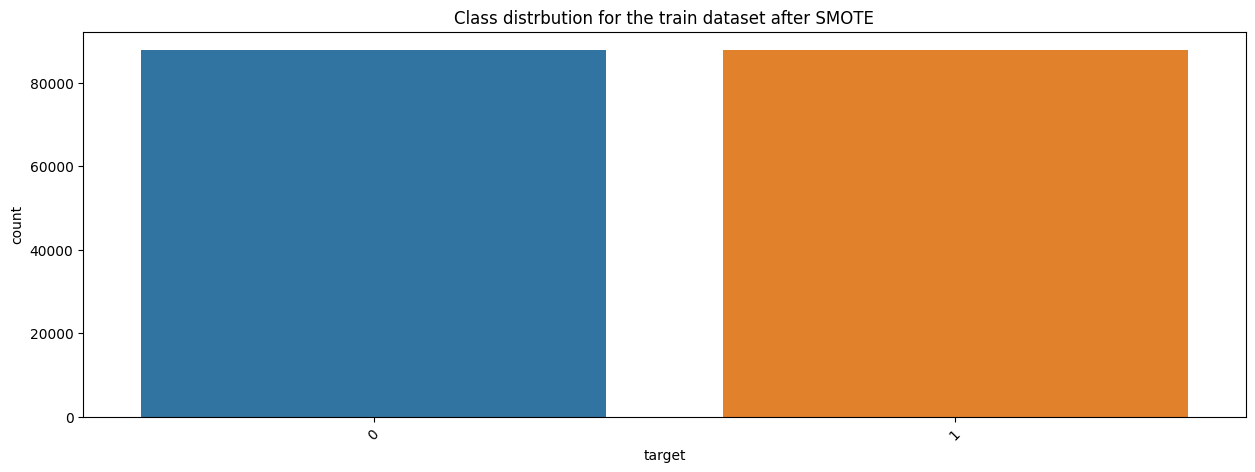

In [271]:
print(y_dataover.value_counts())
plt.figure(figsize=(15, 5))
sns.countplot(x = y_dataover)
plt.xticks(rotation = 45)
plt.title("Class distrbution for the train dataset after SMOTE")

In [164]:
banalced_dataset= X_dataover.copy()
banalced_dataset['target'] =  y_dataover
banalced_dataset

,same_srv_rate,src_bytes,diff_srv_rate,count,dst_host_same_srv_rate,dst_bytes,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,...,service_2,service_3,service_4,service_5,service_6,flag_0,flag_1,flag_2,flag_3,target
0,1.00,181,0.000000,8,1.000000,5450,9,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,1.00,239,0.000000,8,1.000000,486,19,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,1.00,235,0.000000,8,1.000000,1337,29,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,1.00,219,0.000000,6,1.000000,1337,39,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,1.00,217,0.000000,6,1.000000,2032,49,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175659,0.02,0,0.050271,282,0.030000,0,7,0.050271,1.0,1.0,...,0,1,1,0,0,0,1,0,1,1
175660,1.00,54540,0.000000,3,1.000000,8314,132,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,1
175661,0.18,0,0.050000,112,0.080000,0,20,0.050000,1.0,1.0,...,0,1,1,0,0,0,1,0,1,1
175662,0.08,0,0.064931,210,0.064931,0,16,0.060000,0.0,0.0,...,0,1,1,0,0,0,0,1,1,1


- Second, we will try the three models again (Random forest, Tabnet, XGBoost) after feature selection and data balancing to see if the base models are improved.

1) Random Forest

As you can see after hyper parameter tuning, feature selection, and resampling, the recall improved from 0.845 to 0.849 which is not that much.

In [165]:
from sklearn.model_selection import GridSearchCV


x_train = banalced_dataset.drop(labels = ['target'], axis=1)
y_train = banalced_dataset['target']

x_test = test_data.drop(labels = ['target'], axis=1)
y_test = test_data['target']

RF_classifier_tuned = RandomForestClassifier(random_state=0)

params = {'max_depth':[ 10 ,15 ,20, 25 , 30],
          'min_samples_leaf':[10,15,20],
          'min_samples_split':[10,15,20,25],
          'criterion':['gini','entropy']}

RF_classifier_tuned = GridSearchCV(estimator = RF_classifier_tuned, param_grid= params , cv=5 , n_jobs=-1 , verbose=True, scoring='recall')
RF_classifier_tuned.fit(x_train , y_train )





Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 15, 20, 25]},
             scoring='recall', verbose=True)

In [480]:

best_RF_classifier = RF_classifier_tuned.best_estimator_

y_pred = best_RF_classifier.predict(x_test)
y_pred_prob_RF = best_RF_classifier.predict_proba(x_test)
recall1 = recall_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

print("accuracy: " , accuracy_score(y_test, y_pred))
print( "Recall for class 1: ", recall1)
best_RF_classifier

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     47913
           1       0.99      0.85      0.91     29378

    accuracy                           0.94     77291
   macro avg       0.95      0.92      0.93     77291
weighted avg       0.94      0.94      0.94     77291

accuracy:  0.9391520358127078
Recall for class 1:  0.849138811355436


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=25, random_state=0)

Max recall =  0.8992443324937027
Min recall =  0.8123425692695214


Text(0, 0.5, 'recall score')

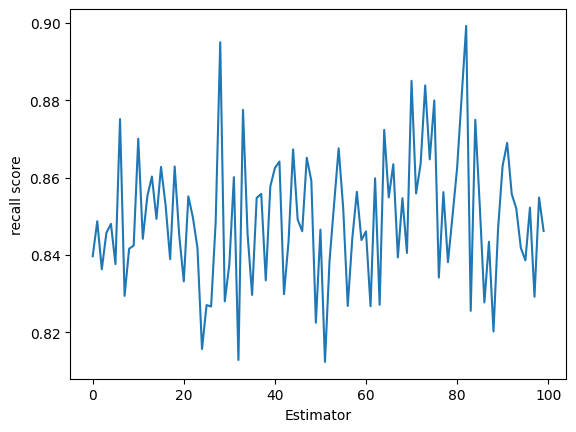

In [479]:
recall_list = []
for estimator in best_RF_classifier.estimators_ :
    recall_list.append(recall_score(y_test, estimator.predict(x_test.values)))

print("Max recall = ", max(recall_list))
print("Min recall = ", min(recall_list))
plt.plot(recall_list)
plt.xlabel('Estimator')
plt.ylabel('recall score')

2) Tabnet Classifier

For Tabnet classifer, it requires limited hyper parameter tuning.

In [195]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

x_train = banalced_dataset.drop(labels = ['target'], axis=1)
y_train = banalced_dataset['target']

x_test = test_data.drop(labels = ['target'], axis=1)
y_test = test_data['target']
               
                      
tabnet_clf= TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       mask_type='entmax', # "sparsemax",
                       seed=0
                      
                      )
tabnet_clf.fit(
    x_train.values,y_train.values,
    eval_set=[(x_train.values, y_train.values), (x_test.values, y_test.values)],
    eval_name=['train', 'test'],
    eval_metric=[   'balanced_accuracy' , Recall_metric],
    max_epochs=200, patience=110,
    batch_size=1000, virtual_batch_size=1000,
    num_workers=0,
    weights=1,
    drop_last=False
)

C:\Users\debi\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.05764 | train_balanced_accuracy: 0.97449 | train_recall_metric: 0.95415 | test_balanced_accuracy: 0.92335 | test_recall_metric: 0.86204 |  0:00:10s
epoch 1  | loss: 0.02007 | train_balanced_accuracy: 0.98134 | train_recall_metric: 0.9678  | test_balanced_accuracy: 0.91453 | test_recall_metric: 0.84648 |  0:00:20s
epoch 2  | loss: 0.01494 | train_balanced_accuracy: 0.98856 | train_recall_metric: 0.98028 | test_balanced_accuracy: 0.92605 | test_recall_metric: 0.87109 |  0:00:30s
epoch 3  | loss: 0.01381 | train_balanced_accuracy: 0.98785 | train_recall_metric: 0.97845 | test_balanced_accuracy: 0.93242 | test_recall_metric: 0.88216 |  0:00:39s
epoch 4  | loss: 0.01257 | train_balanced_accuracy: 0.98931 | train_recall_metric: 0.98138 | test_balanced_accuracy: 0.94828 | test_recall_metric: 0.90558 |  0:00:49s
epoch 5  | loss: 0.01206 | train_balanced_accuracy: 0.98922 | train_recall_metric: 0.98168 | test_balanced_accuracy: 0.94771 | test_recall_metric: 0.90544 |  0:00:58

C:\Users\debi\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


As you can see the recall increased
for the base tabnet model it was:

Recall for class 1:  0.9227312955272653


the recall showed a slight increse by around 0.05 %

we are more interested in the recall improvement since it quantifies the number of correct positive predictions made out of all positive predictions that could be made by the model.

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     47913
           1       0.97      0.93      0.95     29378

    accuracy                           0.96     77291
   macro avg       0.96      0.95      0.96     77291
weighted avg       0.96      0.96      0.96     77291

Accuracy:  0.9610174535198147
recall:  0.9269521410579346
Max recall:  0.9269521410579346
Min recall:  0.8277963101640684


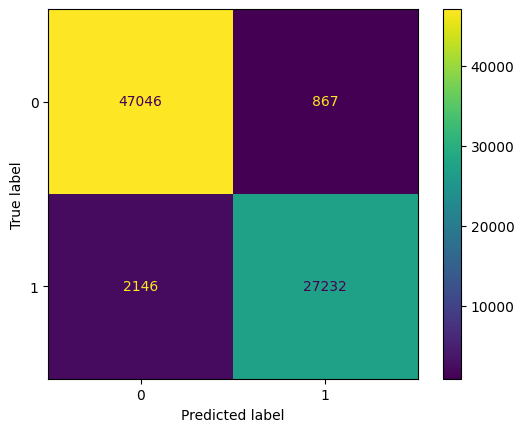

In [481]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

y_pred_TN = tabnet_clf.predict(x_test.values)
y_pred_prob_TN = tabnet_clf.predict_proba(x_test.values)
print(classification_report(y_test.values, y_pred_TN))
recall2 = recall_score(y_test.values, y_pred_TN)
print( "Accuracy: ", accuracy_score(y_test.values, y_pred_TN))
print("recall: " , recall_score(y_test.values, y_pred_TN))
print("Max recall: " , max(tabnet_clf.history['test_recall_metric']))
print("Min recall: " , min(tabnet_clf.history['test_recall_metric']))

cm = confusion_matrix(y_test ,y_pred_TN )
ConfusionMatrixDisplay(cm).plot()

In [169]:
y_pred_TN

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'recall score')

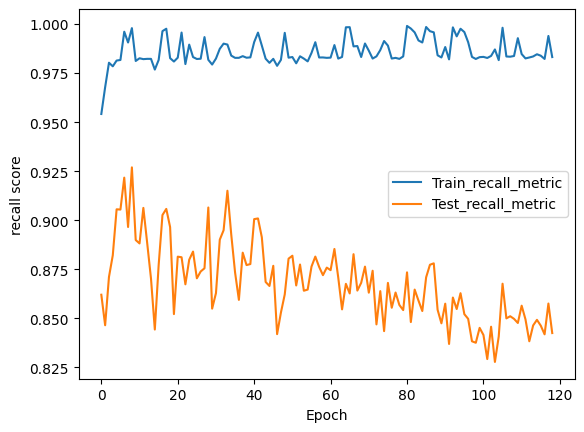

In [482]:
plt.plot(tabnet_clf.history['train_recall_metric'] ,  label= "Train_recall_metric")
plt.plot(tabnet_clf.history['test_recall_metric'] ,  label= "Test_recall_metric")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("recall score")

3) XGBoost classifier

In [ ]:
# %pip install xgboost
# %pip install optuna

In [483]:
x_train = banalced_dataset.drop(labels = ['target'], axis=1)
y_train = banalced_dataset['target']

X_test_data = test_data.drop('target',axis=1)
y_test_data = test_data['target']

def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(x_train, y_train )

    # Make predictions
    y_pred = optuna_model.predict(X_test_data)

    # Evaluate predictions
    accuracy = recall_score(y_test_data, y_pred)
    return accuracy

In [174]:
import optuna
study = optuna.create_study(direction='maximize')

[I 2022-12-04 22:54:31,073] A new study created in memory with name: no-name-73a982f7-8262-4814-9801-f6a0e23a989e


In [175]:
study.optimize(objective, n_trials=100)

C:\Users\debi\AppData\Local\Temp\ipykernel_12492\1318020547.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\debi\AppData\Local\Temp\ipykernel_12492\1318020547.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\debi\AppData\Local\Temp\ipykernel_12492\1318020547.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': tr

In [176]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8801484103751106
  Params: 
    max_depth: 8
    learning_rate: 0.04249760120590394
    n_estimators: 431
    min_child_weight: 7
    gamma: 5.532702501941433e-07
    subsample: 0.05812005150513689
    colsample_bytree: 0.8153721340881528
    reg_alpha: 1.0062567980318055e-08
    reg_lambda: 3.4263866285617176e-07


the old base model metric was, Recall for class 1:  0.8411396282932807
as you can see the recall increased by arround 0.2

In [484]:
from sklearn.metrics import recall_score
params = trial.params
xgbc = XGBClassifier(**params, random_state=0 , objective = "multi:softmax", num_class=2 , eval_metric=recall_score)
xgbc.fit(x_train, y_train , eval_set=[(X_test_data, y_test_data)], verbose=0)
preds = xgbc.predict(X_test_data)
y_pred_prob_XGB = xgbc.predict_proba(X_test_data)


print(classification_report(y_test_data,preds))
recall3 = recall_score(y_test_data, preds)
print( "Accuracy: ", accuracy_score(y_test_data, preds))
print("recall: " , recall_score(y_test_data, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     47913
           1       0.99      0.86      0.92     29378

    accuracy                           0.94     77291
   macro avg       0.95      0.93      0.94     77291
weighted avg       0.95      0.94      0.94     77291

Accuracy:  0.9435380574711156
recall:  0.862005582408605


Max recall =  0.866703
Min recall =  0.850807


Text(0, 0.5, 'recall score')

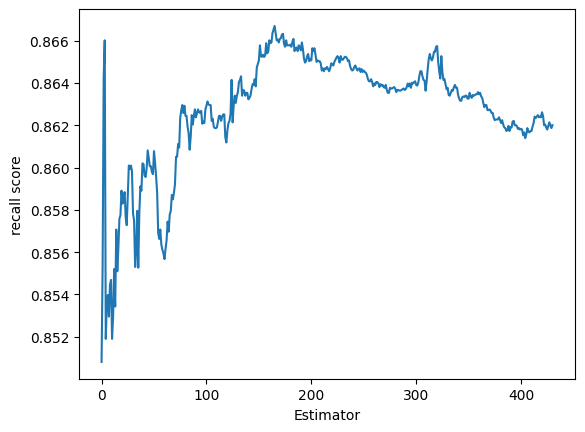

In [485]:
print("Max recall = ", max(xgbc.evals_result()['validation_0']['recall_score']))
print("Min recall = ", min(xgbc.evals_result()['validation_0']['recall_score']))
plt.plot(xgbc.evals_result()['validation_0']['recall_score'])
plt.xlabel('Estimator')
plt.ylabel('recall score')

# Creating a voting Ensemble to combine the three models

the overall recall incresed to 0.9335557219688202

In [270]:
Average_predictions = np.ndarray.round((y_pred + y_pred_TN + preds) / 3 )
Ensemble_vote_predictions = Average_predictions
Ensemble_vote_accuracy = recall_score(y_test_data , Ensemble_vote_predictions)
print(classification_report(y_test_data , Ensemble_vote_predictions))
print("Ensemble_vote_Recall",Ensemble_vote_accuracy)


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     47913
           1       0.99      0.93      0.96     29378

    accuracy                           0.97     77291
   macro avg       0.97      0.96      0.97     77291
weighted avg       0.97      0.97      0.97     77291

Ensemble_vote_Recall 0.9335557219688202


In [ ]:
# %pip install pyod

## Out of curiousity, we try anomlie detection using the OCSVM model, we get a recall of 0.77 which is lower than all of the tried machine learning models above

In [240]:
from sklearn.ensemble import IsolationForest

from pyod.models.iforest import IForest 
from sklearn.svm import OneClassSVM as OCSVM 

x_train = train_data.drop(labels = ['target'], axis=1)
y_train = train_data['target']


X_test = test_data.drop(labels = ['target'], axis=1)
y_test = test_data['target']

ocsvm = OCSVM(gamma='auto', kernel='linear' ) 
y_hat =  ocsvm.fit_predict(x_train, y_train) 


In [246]:
y_hat = ocsvm.predict(X_test) 

# len(y_hat)

In [247]:
y_hat

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int64)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83     47913
           1       0.70      0.77      0.73     29378

    accuracy                           0.79     77291
   macro avg       0.78      0.79      0.78     77291
weighted avg       0.79      0.79      0.79     77291



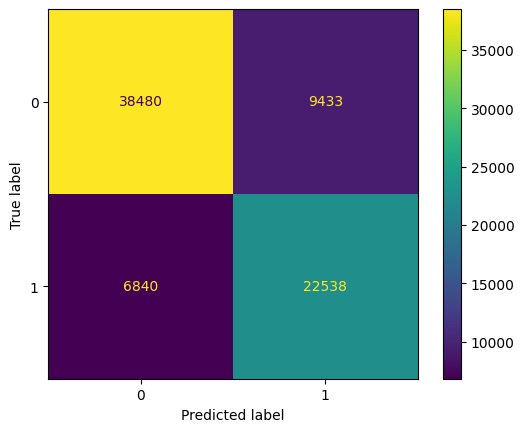

In [257]:

predictions = [1 if I == -1 else 0 for I in y_hat ]
cm = confusion_matrix(y_test , predictions)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test , predictions))